In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Split data
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

In [5]:
train.shape, validate.shape, test.shape

((121, 5), (14, 5), (15, 5))

In [6]:
#Scale the data
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

# Cluster

1. choose features to cluster on
2. choose k
3. create and fit the model


In [7]:
X = train_scaled[['petal_length', 'sepal_length']]


In [8]:
X.head()

,petal_length,sepal_length
41,-1.333104,-1.608304
142,0.796712,-0.040855
82,0.124139,-0.040855
127,0.684617,0.320864
28,-1.277056,-0.764293


In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_length,sepal_length
0,0.767214,0.736523
1,-1.218460,-0.953373
2,1.479476,1.954079
3,0.292282,-0.269083


In [12]:
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,1
142,5.8,2.7,5.1,1.9,virginica,3
82,5.8,2.7,3.9,1.2,versicolor,3
127,6.1,3.0,4.9,1.8,virginica,0
28,5.2,3.4,1.4,0.2,setosa,1


In [14]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.444737,2.950000,5.047368,1.731579
1,5.043182,3.427273,1.504545,0.275000
2,7.454545,3.136364,6.318182,2.027273
3,5.610714,2.685714,4.200000,1.392857


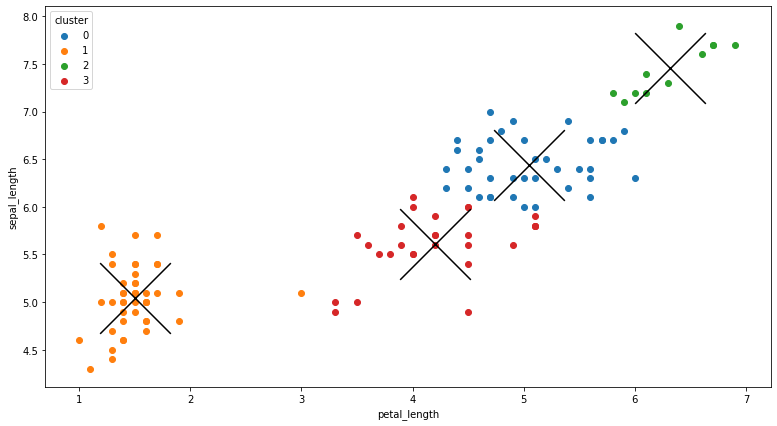

In [15]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')

# Elbow Method

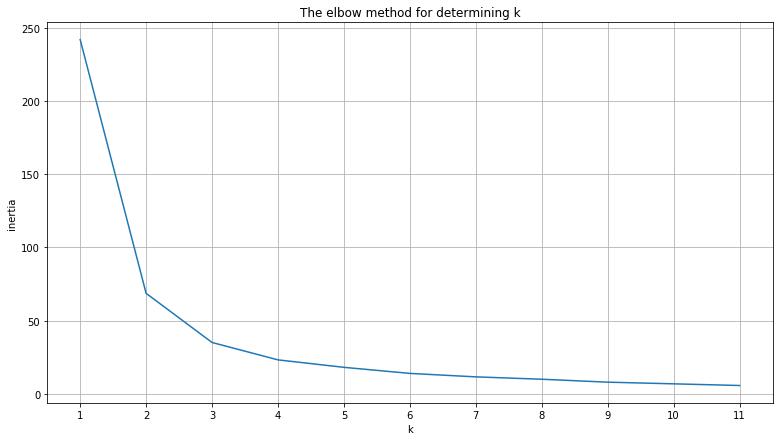

In [16]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()